In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu', name='layer_1'),
    layers.Dense(10, activation='softmax', name='layer_2')
], name = 'metabloit_model')

In [2]:
model.build(input_shape=(None, 3))

In [3]:
model.summary()

Model: "metabloit_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 64)                256       
                                                                 
 layer_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.weights


[<tf.Variable 'layer_1/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.2553209 ,  0.287982  , -0.00704956,  0.28519863, -0.11082467,
          0.11136776, -0.26424506, -0.27871722,  0.06310788, -0.14268665,
          0.2062701 ,  0.1506615 , -0.15369071, -0.28950098,  0.18035582,
         -0.12755215, -0.29343164,  0.2593634 , -0.02026153,  0.0048497 ,
          0.19475359, -0.12874843, -0.26325732,  0.15544808,  0.25633484,
          0.06974739, -0.22797859, -0.07538269, -0.16036376, -0.18983945,
         -0.19969746,  0.07141015,  0.06329522, -0.08669883, -0.19917284,
         -0.2848339 ,  0.01271719, -0.18457937, -0.2647405 , -0.0822043 ,
          0.11632928,  0.18112624, -0.00637639, -0.15374678, -0.02995828,
          0.07824537,  0.02587935, -0.21795899, -0.27454734, -0.137232  ,
          0.26855987, -0.29417494,  0.1459102 , -0.14596535, -0.21710502,
          0.12490895, -0.00515199,  0.27933705,  0.22621018, -0.18900804,
          0.13766915, -0.08171158,  0.06003

In [5]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation='relu', name='layer_1'))


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.add(layers.Dense(10, activation='softmax', name='last_layer'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 64)                256       
                                                                 
 last_layer (Dense)          (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [9]:
model._name = 'metabloit_model'

In [10]:
model.summary()

Model: "metabloit_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 64)                256       
                                                                 
 last_layer (Dense)          (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [11]:
#--------------------#
#Functional API------/
#--------------------#

In [12]:
inputs = keras.Input(shape=(3,), name='my_input')
features = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10, activation='softmax')(features)
model = keras.Model(inputs=inputs, outputs=outputs, name='functional_1')


In [13]:
model.summary()

Model: "functional_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Customer support ticket system ranker

# Multi-input and multi-output model
vocabulary_size = 10000
num_tags = 100
num_departments = 4

#inputs
title = keras.Input(shape=(vocabulary_size,), name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags = keras.Input(shape=(num_tags,), name='tags')

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation='relu')(features)

#outputs
priority = layers.Dense(1, activation='sigmoid', name='priority')(features)
department = layers.Dense(num_departments, activation='softmax', name='department')(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',          

In [16]:
import numpy as np

num_samples = 1280
title_data, text_body_data = np.random.randint(0, 2, size=(2, num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer='rmsprop', loss=['mean_squared_error', 'categorical_crossentropy'],
              metrics=[['mean_absolute_error'], ['accuracy']])

model.fit([title_data, text_body_data, tags_data], [priority_data, department_data],
          epochs=1)

model.evaluate([title_data, text_body_data, tags_data], [priority_data, department_data])

priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 1s 6ms/step - loss: 25.2473 - priority_loss: 0.3453 - department_loss: 24.9021 - priority_mean_absolute_error: 0.5111 - department_accuracy: 0.2672

In [17]:
priority_preds

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

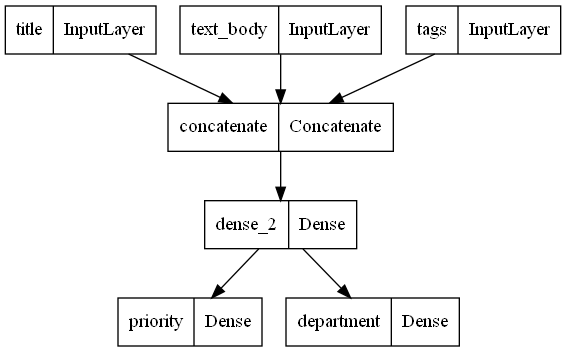

In [18]:
keras.utils.plot_model(model, "ticket-classifier.png")

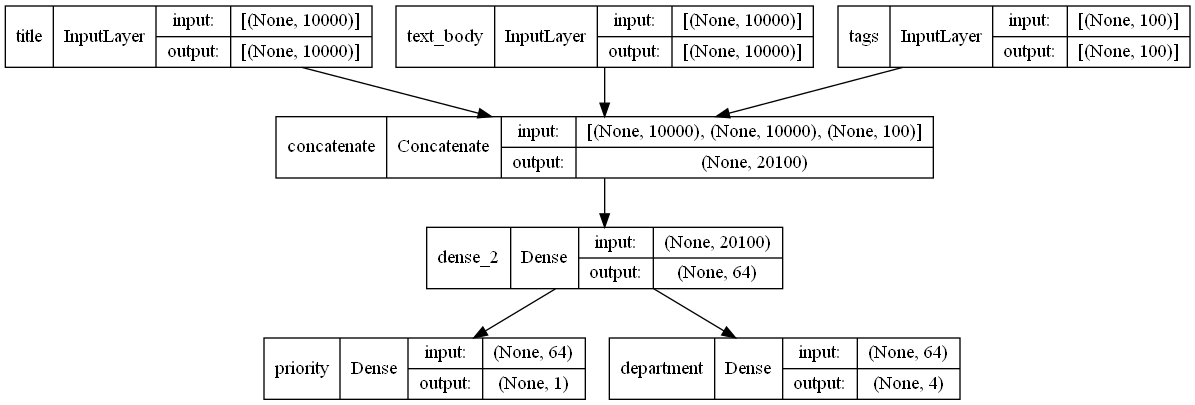

In [19]:
keras.utils.plot_model(model, "ticket-classifier_with_shape_info.png", show_shapes=True)

In [20]:
model.layers

In [21]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation='softmax', name='difficulty')(features)

new_model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department,
                                                                  difficulty])

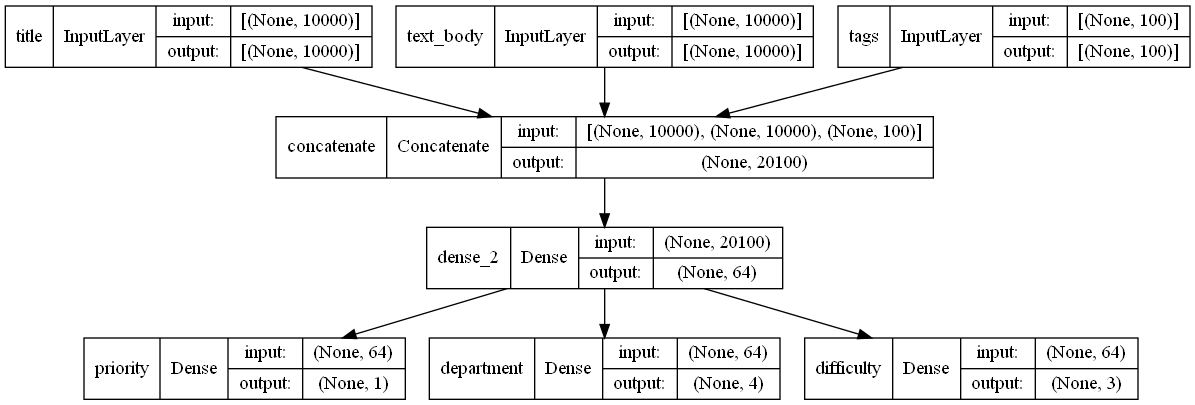

In [22]:
keras.utils.plot_model(new_model, 'updated_ticket_classifier.png', show_shapes=True)

In [23]:
#Subclassing a model class


In [24]:
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation='relu')(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation='softmax')(features)

    model = keras.Model(inputs, outputs)
    return model


In [25]:
import tensorflow as tf

class RootMeanSquaredError(tf.keras.metrics.Metric):
    def __init__(self, name='RMSE', **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name='mse_sum', initializer='zeros')
        self.total_samples = self.add_weight(name='total_samples', initializer='zeros',
                                             dtype='int32')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum/tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)



In [26]:
from tensorflow.keras.datasets import mnist

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]


In [27]:
callback_list = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=2
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='checkpoint_path.keras',
        monitor='val_loss',
        save_best_only=True
    )
]

model = get_mnist_model()

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels),
          callbacks=callback_list)

test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2971 - accuracy: 0.9118 - val_loss: 0.1605 - val_accuracy: 0.9563

Epoch 1/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0926 - accuracy: 0.9795 - val_loss: 0.1139 - val_accuracy: 0.9784

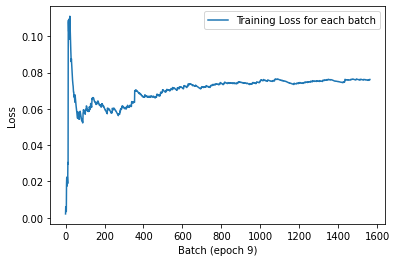

In [28]:
import matplotlib.pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses=[]

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get('loss'))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label='Training Loss for each batch')
        plt.xlabel(f'Batch (epoch {epoch})')
        plt.ylabel('Loss')
        plt.legend()
        plt.savefig(f'plot_at_epoch_{epoch}')
        self.per_batch_losses=[]

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels),
          callbacks=[LossHistory()])


In [12]:
import tensorflow as tf
import keras

model = get_mnist_model()
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

path_dir = 'C:/PythonProjects/DeepLearning/Critical_basics'
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=path_dir+'/log_dir_path')

model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels),
          callbacks=[tensorboard])


Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2962 - accuracy: 0.9121 - val_loss: 0.1467 - val_accuracy: 0.9590